<a href="https://colab.research.google.com/github/dspohnholtz/cs4410/blob/main/spohnholtz_homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Troy University, CS4410

Created By: Dan Spohnholtz

Homework 5

# **Elbow Method on Iris Dataset**



## **Loading the Dataset**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
iris = load_iris()

## **Examine Data**

In [4]:
df=pd.DataFrame(iris['data'])
print(df.head())

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


## **Executing K-Means with Range k**

In [11]:
wcss = []
K = range(1,10)
for k in K:
  kMeanModel = KMeans(n_clusters=k)
  kMeanModel.fit(df)
  wcss.append(kMeanModel.inertia_)

## **Plotting the Intertia of K-Means**

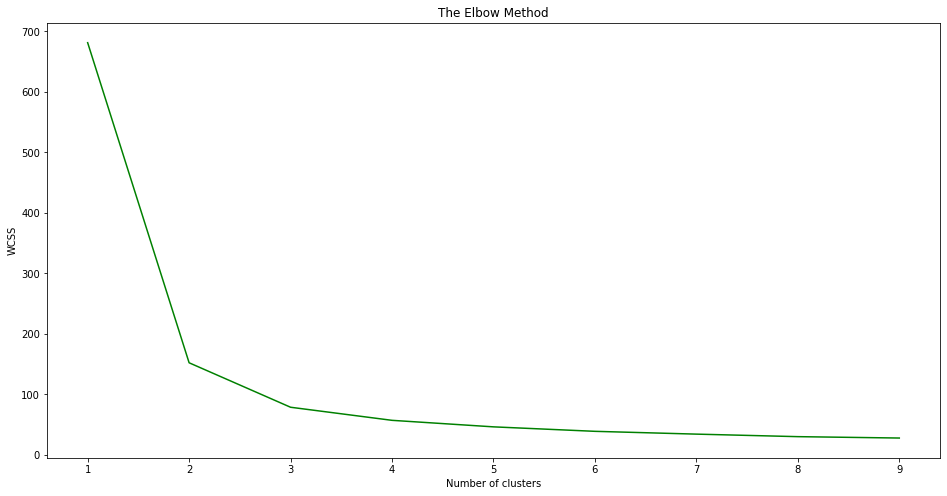

In [14]:
plt.figure(figsize=(16,8))
plt.plot(K, wcss, 'g-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

# **Impact of PCA Dimensional Reduction on MNIST Dataset**

## **Load the Dataset**

In [86]:
import numpy as np
import time, datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

## **Split Data into Training and Testing Groups**

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    mnist.data, mnist.target, random_state = 11)

## **Standardizing Data with StandardScaler**

In [88]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Training Model with Logistic Regression Before Applying PCA**

In [89]:
start = datetime.datetime.now()
logRegr = LogisticRegression(solver='lbfgs', max_iter=10000)
logRegr.fit(X_train, y_train)
predictions = logRegr.predict(X_test)
end = datetime.datetime.now()
processTime = (end-start)
prePCATime = datetime.timedelta.total_seconds(processTime)
prePCA_acc = logRegr.score(X_test, y_test)

## **Applying PCA to Data**

In [90]:
pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## **Training and Predicitng Model with Logistic Regression After Applying PCA**

In [91]:
start = datetime.datetime.now()
logRegr = LogisticRegression(solver='lbfgs', max_iter=10000)
logRegr.fit(X_train, y_train)
predictions = logRegr.predict(X_test)
end = datetime.datetime.now()
processTime = (end-start)
postPCATime = datetime.timedelta.total_seconds(processTime)
postPCA_acc = logRegr.score(X_test, y_test)

## **Measuring Model Performance**

In [92]:
print('\u0332'.join('PRE-PCA PERFORMANCE METRICS'))
print(f'Model Accuracy: {prePCA_acc:.3%}')
print(f'Process Time: {prePCATime} seconds')
print('\u0332'.join('POST-PCA PERFORMANCE METRICS'))
print(f'Model Accuracy: {postPCA_acc:.3%}')
print(f'Process Time: {postPCATime} seconds')

P̲R̲E̲-̲P̲C̲A̲ ̲P̲E̲R̲F̲O̲R̲M̲A̲N̲C̲E̲ ̲M̲E̲T̲R̲I̲C̲S
Model Accuracy: 91.326%
Process Time: 302.075946 seconds
P̲O̲S̲T̲-̲P̲C̲A̲ ̲P̲E̲R̲F̲O̲R̲M̲A̲N̲C̲E̲ ̲M̲E̲T̲R̲I̲C̲S
Model Accuracy: 92.097%
Process Time: 126.519756 seconds
